Author(s): Saleem A. Al Dajani
6.5310 lecture open problem

#Coarser landscape

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

# Define the empirical formula function
def max_folds(w, t):
    return 0.96 * np.log(w / t)

# Define a function to evaluate foldability using a geometric constraint model
def foldability_check(w, t, crease_angles):
    """
    Checks if a rigid folding path exists given the width, thickness, and crease angles.
    Returns a score (0 = not foldable, 1 = foldable).
    """
    max_n = max_folds(w, t)
    actual_n = len(crease_angles)

    # If actual folds exceed empirical limit, return 0 (not foldable)
    if actual_n > max_n:
        return 0

    # Check if folding constraints allow for a continuous rigid folding path
    # (simplified model: we minimize crease self-intersection)
    def objective(x):
        return np.sum(np.abs(np.diff(x)))  # Sum of fold angle differences

    bounds = [(-np.pi, np.pi)] * actual_n  # Folds must remain within [-180, 180] degrees
    result = minimize(objective, crease_angles, bounds=bounds)

    # If the optimizer finds a smooth transition, consider it foldable
    return 1 if result.success else 0

# Simulation Parameters
widths = np.linspace(10, 100, 5)  # Material width values
thicknesses = np.linspace(0.1, 5, 5)  # Material thickness values
crease_patterns = {
    "Flat Single Vertex": [np.pi/3, -np.pi/3, np.pi/4, -np.pi/4],
    "Nonflat Single Vertex": [np.pi/2, -np.pi/2, np.pi/3, -np.pi/3],
}

# Run simulation
results = []
for w in widths:
    for t in thicknesses:
        for pattern, angles in crease_patterns.items():
            foldable = foldability_check(w, t, angles)
            results.append([w, t, pattern, foldable])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Width", "Thickness", "Crease Pattern", "Foldable"])

    Width  Thickness         Crease Pattern  Foldable
0    10.0      0.100     Flat Single Vertex         1
1    10.0      0.100  Nonflat Single Vertex         1
2    10.0      1.325     Flat Single Vertex         0
3    10.0      1.325  Nonflat Single Vertex         0
4    10.0      2.550     Flat Single Vertex         0
5    10.0      2.550  Nonflat Single Vertex         0
6    10.0      3.775     Flat Single Vertex         0
7    10.0      3.775  Nonflat Single Vertex         0
8    10.0      5.000     Flat Single Vertex         0
9    10.0      5.000  Nonflat Single Vertex         0
10   32.5      0.100     Flat Single Vertex         1
11   32.5      0.100  Nonflat Single Vertex         1
12   32.5      1.325     Flat Single Vertex         0
13   32.5      1.325  Nonflat Single Vertex         0
14   32.5      2.550     Flat Single Vertex         0
15   32.5      2.550  Nonflat Single Vertex         0
16   32.5      3.775     Flat Single Vertex         0
17   32.5      3.775  Nonfla

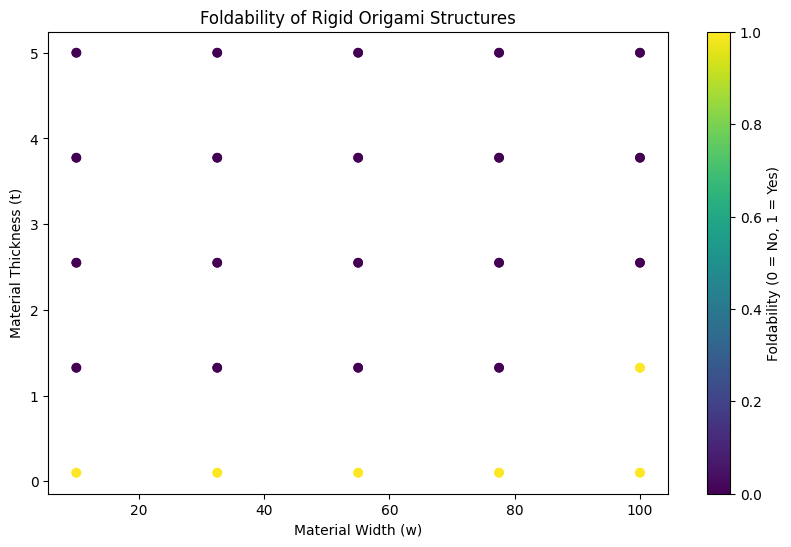

In [12]:
# Display results without ace_tools
import matplotlib.pyplot as plt

# Display the DataFrame
print(df_results)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

for pattern in crease_patterns.keys():
    subset = df_results[df_results["Crease Pattern"] == pattern]
    scatter = ax.scatter(subset["Width"], subset["Thickness"], c=subset["Foldable"], label=pattern)

ax.set_xlabel("Material Width (w)")
ax.set_ylabel("Material Thickness (t)")
ax.set_title("Foldability of Rigid Origami Structures")
plt.colorbar(scatter, label="Foldability (0 = No, 1 = Yes)")
plt.show()

#Finer landscape

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

# Define the empirical formula function
def max_folds(w, t):
    return 0.96 * np.log(w / t)

# Define a function to evaluate foldability using a geometric constraint model
def foldability_check(w, t, crease_angles):
    """
    Checks if a rigid folding path exists given the width, thickness, and crease angles.
    Returns a score (0 = not foldable, 1 = foldable).
    """
    max_n = max_folds(w, t)
    actual_n = len(crease_angles)

    # If actual folds exceed empirical limit, return 0 (not foldable)
    if actual_n > max_n:
        return 0

    # Check if folding constraints allow for a continuous rigid folding path
    # (simplified model: we minimize crease self-intersection)
    def objective(x):
        return np.sum(np.abs(np.diff(x)))  # Sum of fold angle differences

    bounds = [(-np.pi, np.pi)] * actual_n  # Folds must remain within [-180, 180] degrees
    result = minimize(objective, crease_angles, bounds=bounds)

    # If the optimizer finds a smooth transition, consider it foldable
    return 1 if result.success else 0

# Simulation Parameters
widths = np.linspace(10, 1000, 50)  # Material width values
thicknesses = np.linspace(0.01, 5, 50)  # Material thickness values
crease_patterns = {
    "Flat Single Vertex": [np.pi/3, -np.pi/3, np.pi/4, -np.pi/4],
    "Nonflat Single Vertex": [np.pi/2, -np.pi/2, np.pi/3, -np.pi/3],
}

# Run simulation
results = []
for w in widths:
    for t in thicknesses:
        for pattern, angles in crease_patterns.items():
            foldable = foldability_check(w, t, angles)
            results.append([w, t, pattern, foldable])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Width", "Thickness", "Crease Pattern", "Foldable"])

       Width  Thickness         Crease Pattern  Foldable
0       10.0   0.010000     Flat Single Vertex         1
1       10.0   0.010000  Nonflat Single Vertex         1
2       10.0   0.111837     Flat Single Vertex         1
3       10.0   0.111837  Nonflat Single Vertex         1
4       10.0   0.213673     Flat Single Vertex         0
...      ...        ...                    ...       ...
4995  1000.0   4.796327  Nonflat Single Vertex         1
4996  1000.0   4.898163     Flat Single Vertex         1
4997  1000.0   4.898163  Nonflat Single Vertex         1
4998  1000.0   5.000000     Flat Single Vertex         1
4999  1000.0   5.000000  Nonflat Single Vertex         1

[5000 rows x 4 columns]


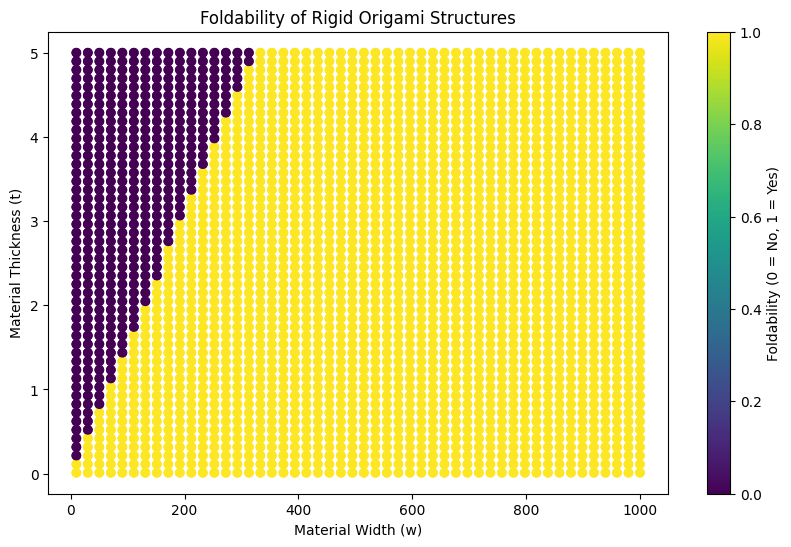

In [10]:
# Display results without ace_tools
import matplotlib.pyplot as plt

# Display the DataFrame
print(df_results)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

for pattern in crease_patterns.keys():
    subset = df_results[df_results["Crease Pattern"] == pattern]
    scatter = ax.scatter(subset["Width"], subset["Thickness"], c=subset["Foldable"], label=pattern)

ax.set_xlabel("Material Width (w)")
ax.set_ylabel("Material Thickness (t)")
ax.set_title("Foldability of Rigid Origami Structures")
plt.colorbar(scatter, label="Foldability (0 = No, 1 = Yes)")
plt.show()

#Vertices

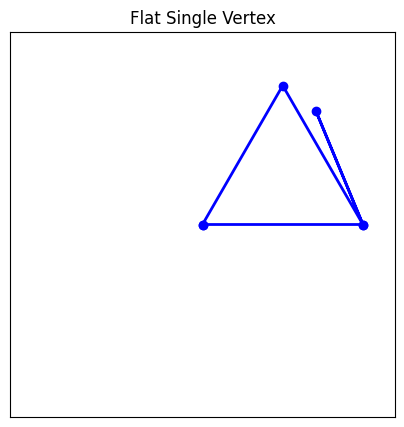

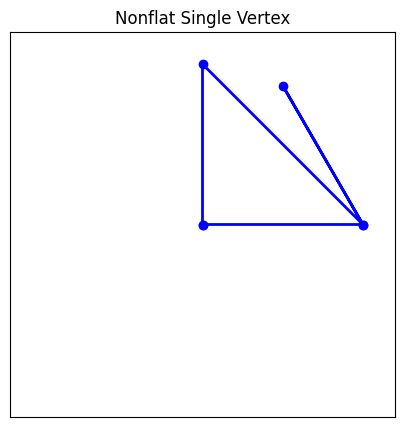

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_single_vertex(angles, title):
    """
    Plots a single-vertex crease pattern.
    """
    fig, ax = plt.subplots(figsize=(5,5))

    # Convert angles to Cartesian coordinates
    x, y = [0], [0]  # Start at the origin
    for angle in np.cumsum(angles):  # Cumulative sum to determine positions
        x.append(np.cos(angle))
        y.append(np.sin(angle))

    # Close the loop to form a star-like pattern
    x.append(x[0])
    y.append(y[0])

    ax.plot(x, y, 'bo-', linewidth=2)  # Plot creases
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    ax.set_aspect('equal')

# Define crease patterns
flat_vertex_angles = [np.pi/3, -np.pi/3, np.pi/4, -np.pi/4]  # 60°, -60°, 45°, -45°
nonflat_vertex_angles = [np.pi/2, -np.pi/2, np.pi/3, -np.pi/3]  # 90°, -90°, 60°, -60°

# Plot both
plot_single_vertex(flat_vertex_angles, "Flat Single Vertex")
plot_single_vertex(nonflat_vertex_angles, "Nonflat Single Vertex")

plt.show()
